In [50]:
% matplotlib inline
import numpy as np
from helpers import load_data
import scipy.sparse as sp

files_full_numpy = [\
        #'../submission/saved_0.98475.npy',\
        #'../submission/saved_0.984.npy', \
        '../saved/blend_0.06255_8.npy']

file_train_true = '../data/data_train.csv'
file_submission_true = '../data/sampleSubmission.csv'

In [13]:
# second 
folder = 'second'
# trained on whole dataset:
#'../submission/train_surprise_unrounded_0.99256.csv'
files_full_submission = [ \
    '../submission/training_prediction_ALS_BaselineOnly.csv',\
    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_item_based.csv',\
    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_user_based.csv',\
    '../submission/training_prediction_KNNBasic_pearson_baseline_user_based.csv',\
    '../submission/training_prediction_SGD_BaselineOnly.csv'
    ]
files_submission = [ \
    '../submission/submission_ALS_BaselineOnly.csv',\
    '../submission/submission_KNNBasic_ALS_pearson_baseline_item_based.csv',\
    '../submission/submission_KNNBasic_ALS_pearson_baseline_user_based.csv',\
    '../submission/submission_KNNBasic_pearson_baseline_user_based.csv',\
    '../submission/submission_SGD_BaselineOnly.csv'
                    ]
#files_submission = [ \
#        '../submission/submission_surprise_unrounded_0.99256.csv']

files_full_numpy = [\
        #'../submission/saved_0.98475.npy',\
        #'../submission/saved_0.984.npy', \
        '../saved/blend_0.06255_8.npy']
#errors_submission = [0.98475, 0.984, 0.98431, 0.99256]

names = ['ALS', 'ALS_Baseline', 'KNN_ALS_item', 'KNN_ALS_user', 'KNN_user', 'SGD_Baseline']
#names = ['ALS','ALS','ALS','SVD surprise']


In [54]:
# third
folder = 'third'
files_submission = [ \
    '../submission/submission_KNNBasic_ALS_pearson_baseline_item_based.csv',
    '../submission/submission_KNNBasic_ALS_pearson_baseline_user_based.csv',
    '../submission/submission_KNNBasic_cosine_item_based.csv',
    '../submission/submission_KNNBasic_cosine_user_based.csv',
    '../submission/submission_KNNBasic_msd_item_based.csv',
    '../submission/submission_KNNBasic_msd_user_based.csv',
    '../submission/submission_KNNBasic_pearson_baseline_item_based.csv',
    '../submission/submission_KNNBasic_pearson_baseline_user_based.csv',
    '../submission/submission_KNNBasic_pearson_user_based.csv',
    '../submission/submission_SGD_BaselineOnly.csv',
    '../submission/submission_surprise_unrounded_0.99256.csv'
                         ]
files_full_submission = [ \
'../submission/training_prediction_ALS_BaselineOnly.csv',
'../submission/training_prediction_KNNBasic_ALS_pearson_baseline_item_based.csv',
'../submission/training_prediction_KNNBasic_ALS_pearson_baseline_user_based.csv',
'../submission/training_prediction_KNNBasic_cosine_item_based.csv',
'../submission/training_prediction_KNNBasic_cosine_user_based.csv',
'../submission/training_prediction_KNNBasic_msd_item_based.csv',
'../submission/training_prediction_KNNBasic_msd_user_based.csv',
'../submission/training_prediction_KNNBasic_pearson_baseline_item_based.csv',
'../submission/training_prediction_KNNBasic_pearson_baseline_user_based.csv',
'../submission/training_prediction_KNNBasic_pearson_user_based.csv',
'../submission/training_prediction_SGD_BaselineOnly.csv'
                         ]

names = [\
'ALS_BaselineOnly',
'KNN_ALS_pearson_baseline_item',
'KNN_ALS_pearson_baseline_user',
'KNN_cosine_item',
'KNN_cosine_user',
'KNN_msd_item',
'KNN_msd_user',
'KNN_pearson_baseline_item',
'KNN_pearson_baseline_user',
'KNN_pearson_user',
'SGD_BaselineOnly'
         ]


In [ ]:
from blending import get_all_indices, read_numpy_files, apply_indices
from our_helpers import load_data
# Read full matrices 
train_true = load_data(file_train_true)
training_true = apply_indices([train_true], 'train')[0]
test_true = apply_indices([train_true], 'test')[0]
validation_true = apply_indices([train_true], 'validation')[0]

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939
treating matrix 0
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403
treating matrix 0


In [8]:
submission_true = load_data(file_submission_true)
indices = get_all_indices(train_true, submission_true)
trains_full = read_numpy_files(files_full_numpy, indices)

number of items: 10000, number of users: 1000
number of rows, cols to read out: 2353904
matrix 0
dense matrix shape: (10000, 1000)
number of non-zero elements in matrix: 2353904


In [9]:
# Apply indices.
from blending import apply_indices
train_est = apply_indices(trains_full, 'train') 
test_est = apply_indices(trains_full, 'test') 
submission_est = apply_indices(trains_full, 'submission') 
validation_est = apply_indices(trains_full, 'validation') 

number of items: 10000, number of users: 1000
number of rows, cols: 1117939
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403
number of non-zero elements in matrix 0: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 1176952
number of non-zero elements in matrix 0: 1176952
number of items: 10000, number of users: 1000
number of rows, cols: 29610
number of non-zero elements in matrix 0: 29610


In [14]:
# Add matrices saved in submission format.
from blending import read_submission_files
surprise_full = read_submission_files(files_full_submission)
surprise_train_est = apply_indices(surprise_full, 'train') 
surprise_test_est = apply_indices(surprise_full, 'test') 
surprise_validation_est = apply_indices(surprise_full, 'validation') 


surprise_submission = read_submission_files(files_submission)

for i in range(len(surprise_train_est)):
    validation_est.append(surprise_validation_est[i])
    train_est.append(surprise_train_est[i])
    test_est.append(surprise_test_est[i])
    submission_est.append(surprise_submission[i])

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939
number of non-zero elements in matrix 0: 1117939
number of non-zero elements in matrix 1: 1117939
number of non-zero elements in matrix 2: 1117939
number of non-zero elements in matrix 3: 1117939
number of non-zero elements in matrix 4: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403
number of non-zero elements in matrix 0: 29403
number of non-zero elements in matrix 1: 29403
number of non-zero elements in matrix 2: 29403
number of non-zero elements in matrix 3: 29403
number of non-zero elements in matrix 4: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 29610
number of non-zero elements in matrix 0: 29610
number of non-zero 

user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565


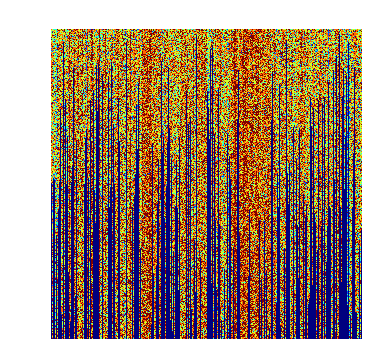

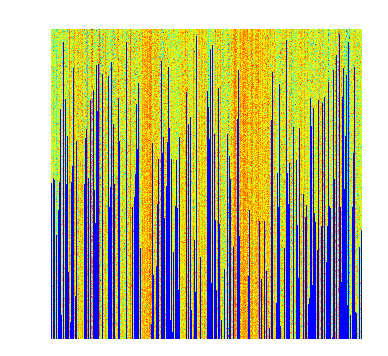

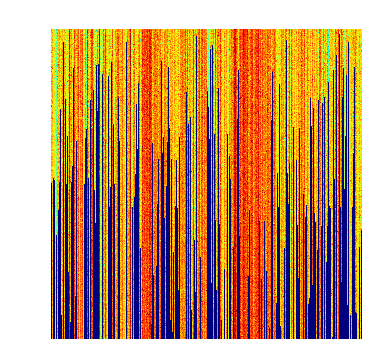

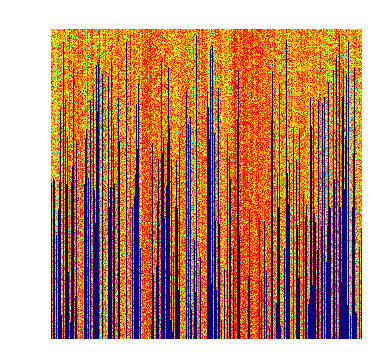

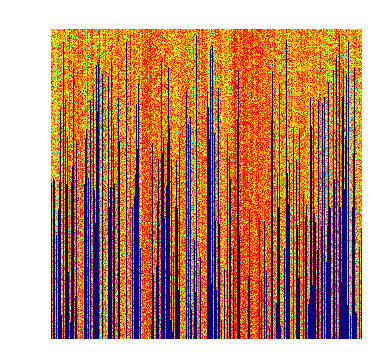

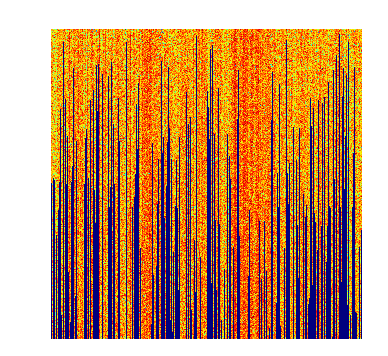

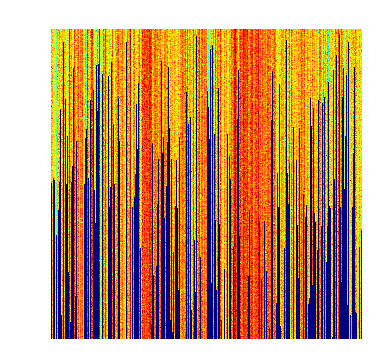

In [16]:
from data_postprocess import create_sparse_matrix_plot
# Visualize matrices
prefix = 'second'
i_total, ratings_dense = create_sparse_matrix_plot(training_true, '../results/Blending/{}/matrix_train.png'.format(folder))

dense_matrices=[]
dense_matrices.append(ratings_dense.copy())
#j_total, _ = create_matrix_plot(train_true, axis=1)
for i,matrix_est in enumerate(train_est):
    __, ratings_dense = create_sparse_matrix_plot(matrix_est, '../results/Blending/{}/matrix_{}'.format(folder,i+1))
    dense_matrices.append(ratings_dense.copy())

diff goes from 4.463386218474259 to -4.126956509506261
diff goes from 4.0 to -3.37255642096
diff goes from 2.82316205161 to -2.3148305929
diff goes from 2.82316205161 to -2.3148305929
diff goes from 3.0568173453 to -2.58407914364
diff goes from 4.0 to -3.4063593375


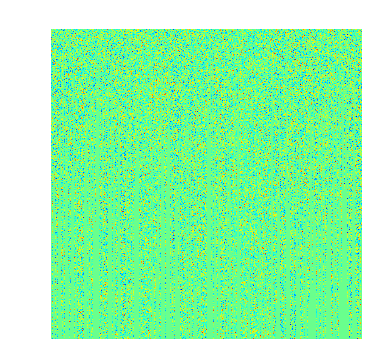

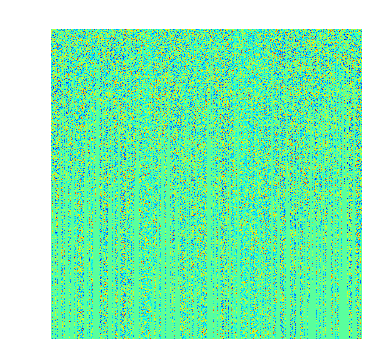

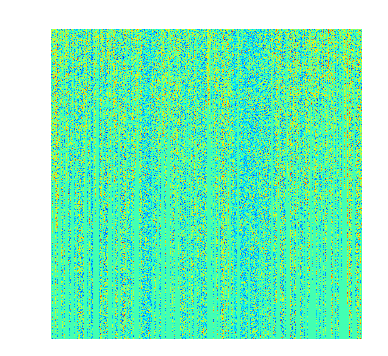

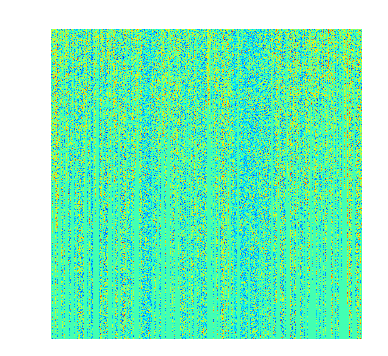

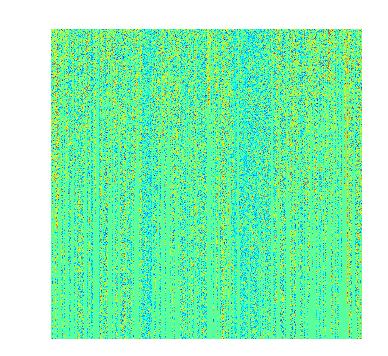

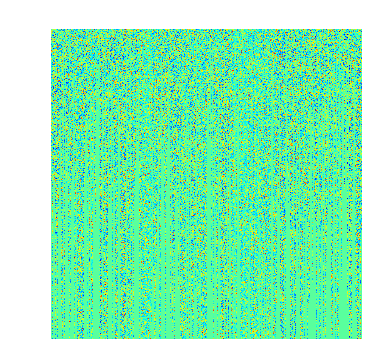

In [18]:
from data_postprocess import matrix_plot
for i in range(1,len(dense_matrices)):
    diff_matrix = dense_matrices[i]-dense_matrices[0]
    print('diff goes from {} to {}'.format(np.max(diff_matrix),np.min(diff_matrix)))
    matrix_plot(diff_matrix, '../results/Blending/{}/matrix_diff{}.png'.format(folder,i), 1000)

In [29]:
test_est_new = [test_est[0],test_est[1], test_est[3], test_est[4], test_est[5]]
submission_est_new = [submission_est[0],submission_est[1], submission_est[3], submission_est[4], submission_est[5]]
from blending import linear_blending
q_hat,x = linear_blending(test_est_new, submission_est_new, test_true)
print(x)
print(q_hat)
print(len(q_hat))

x [ 0.33643929  0.50003195  0.20764324 -0.07169449  0.02307919]
[ 0.33643929  0.50003195  0.20764324 -0.07169449  0.02307919]
[ 3.34609404  3.0563209   3.84458756 ...,  3.21195352  3.31004652
  3.90689503]
1176952


user min, max, mean: 1 121 29.891809909
rmse method 0: 1.0265388057202895
user min, max, mean: 1 121 29.891809909
[ 1.23293337 -0.9873426  -0.84411918 ...,  1.12035945  3.49571785
  0.81037748]
rmse method 1: 0.9987724675769535
user min, max, mean: 1 121 29.891809909
[ 1.08656568 -0.97551826 -0.9694506  ...,  0.74852103  2.39014467
  0.83770956]
rmse method 2: 1.0410121456976962
user min, max, mean: 1 121 29.891809909
[ 1.81723698 -0.4481473  -0.73110261 ...,  1.03124803  2.98028737
  0.86526816]
rmse method 3: 1.0428500174791548
user min, max, mean: 1 121 29.891809909
[ 1.73709007 -0.58891692 -0.87081209 ...,  0.96064408  2.93934824
  0.72407986]
rmse method 4: 1.0005876426194011
user min, max, mean: 1 121 29.891809909
[ 1.01182876 -0.99134448 -1.03609698 ...,  0.77492855  2.39319116
  0.83803034]
blending method: 4
user min, max, mean: 1 121 29.891809909


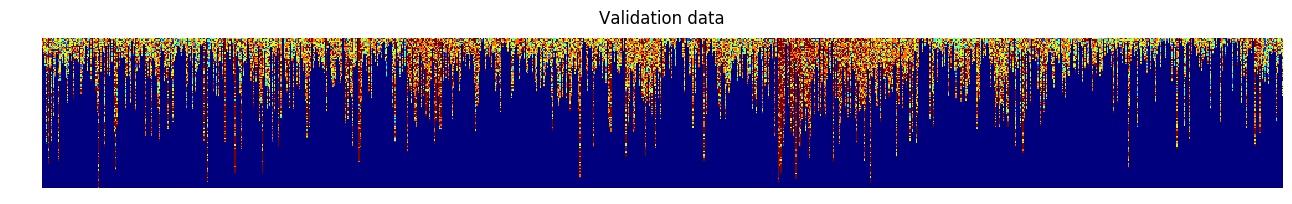

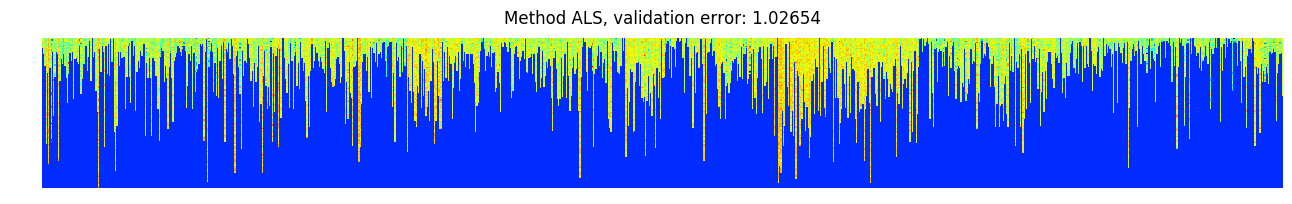

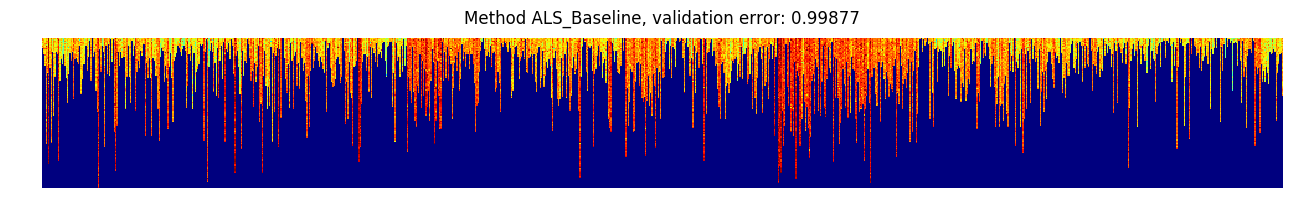

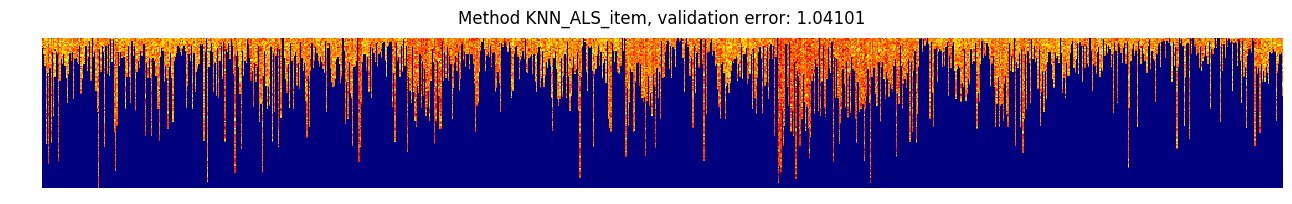

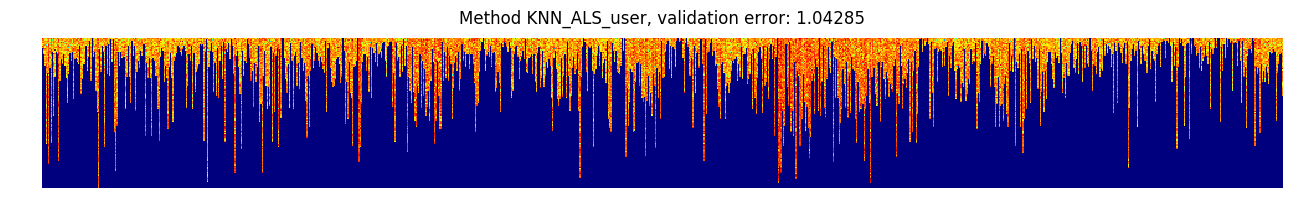

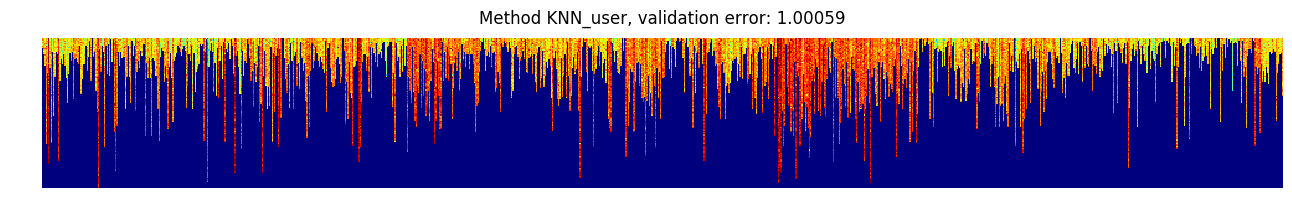

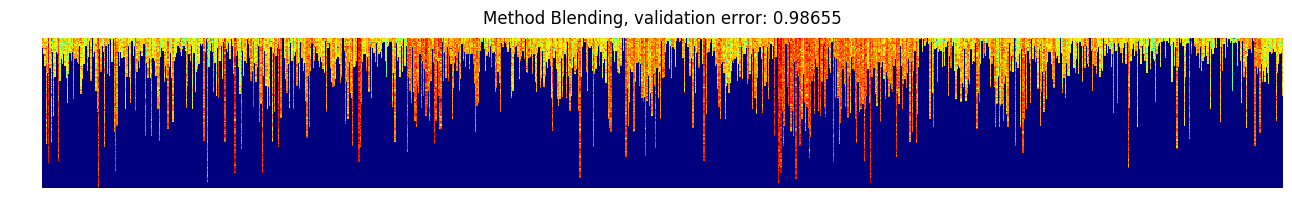

In [32]:
cutoff = 1000
rows,cols,true_values = sp.find(validation_true)
file_name = '../results/Blending/{}/matrix_validation.png'.format(folder)
title = 'Validation data'
i_total, validation_dense = create_sparse_matrix_plot(validation_true, file_name ,cutoff, title)

validation_est_new = [validation_est[0],validation_est[1], validation_est[3], validation_est[4], validation_est[5]]
Q = np.empty((len(true_values),len(validation_est_new)))
for i,validation_prediction in enumerate(validation_est_new):
    __,__,predictions = sp.find(validation_prediction)
    Q[:,i] = predictions
    rmse = np.sqrt(np.sum(np.power(predictions-true_values, 2)) / len(true_values))
    print('rmse method {}: {}'.format(i,rmse))
    file_name = '../results/Blending/{}/matrix_validation_{}.png'.format(folder, i)
    title = 'Method {}, validation error: {:1.5f}'.format(names[i], rmse)
    create_sparse_matrix_plot(validation_prediction, file_name, cutoff, title)
    print(predictions - true_values)


blending_prediction = np.dot(Q,x) 
rmse = np.sqrt(np.sum(np.power(blending_prediction-true_values, 2)) / len(true_values))
print('blending method: {}'.format(i,rmse))

# create sparse matrix from predictions
validation_blending = sp.lil_matrix(validation_true.shape)
for k, (i,j) in enumerate(zip(rows, cols)):
    validation_blending[i,j] = blending_prediction[k]
print(k)
file_name = '../results/Blending/{}/matrix_blending.png'.format(folder)
title = 'Method Blending, validation error: {:1.5f}'.format(rmse)
test = create_sparse_matrix_plot(validation_blending, file_name, cutoff, title)

In [42]:
file = '../data/sampleSubmission.csv'
#indices_matrix = load_data(file)
rows, cols, __ = sp.find(indices_matrix)
print(len(rows))
submission_blending = sp.lil_matrix(validation_true.shape)
k = 0
for (i,j) in zip(rows, cols):
    if q_hat[k] == 0:
        print('one element was zero!')
    submission_blending[i,j] = q_hat[k]
    k += 1
print(k)


1176952
1176952
Saved 1176951 predictions at ../results/Blending/second/submission.csv


In [46]:
from our_helpers import write_predictions_csv
print(submission_blending.nnz)
write_predictions_csv('../results/Blending/{}/submission.csv'.format(folder), submission_blending)

1176952
rows: 1176952
Saved 1176952 predictions at ../results/Blending/second/submission.csv


In [47]:
ratings = load_data('../results/Blending/s{}/submission.csv'.format(folder))
print(ratings.nnz)

number of items: 10000, number of users: 1000
1176952
